# Stage Analysis

In this notebook I analyze the time the program takes for each stage of the algorithm.
Here you will find the 3 versions:

1. Sequential
2. Parallel THR (Native C++ Threads)
3. Parallel FF (using Fast Flow Lib)


In [8]:
from b_tools.preprocess import get_standardized_measures

### Sequential

In [9]:
# Choose the file
SEQ_RESULT_FILE="results/sequential_10.csv"

In [10]:
seq = get_standardized_measures(SEQ_RESULT_FILE)

In [11]:
seq.describe()

,READING,HUFFBUILD,ENCODING,TOTAL
count,5.000000e+00,5.000000,5.000000e+00,5.000000e+00
mean,1.174975e+09,66928.000000,1.193051e+09,2.368093e+09
std,4.863861e+06,616.178546,8.766532e+06,1.108957e+07
min,1.167498e+09,65874.000000,1.180520e+09,2.357949e+09
25%,1.172945e+09,66914.000000,1.189916e+09,2.359633e+09
50%,1.177199e+09,67166.000000,1.192070e+09,2.362929e+09
75%,1.177362e+09,67286.000000,1.200667e+09,2.377933e+09
max,1.179869e+09,67400.000000,1.202083e+09,2.382020e+09


In [12]:
seq_stages = list(seq.columns)
seq_stages.remove('TOTAL')
seq_means = [seq[stage].mean() for stage in seq_stages]

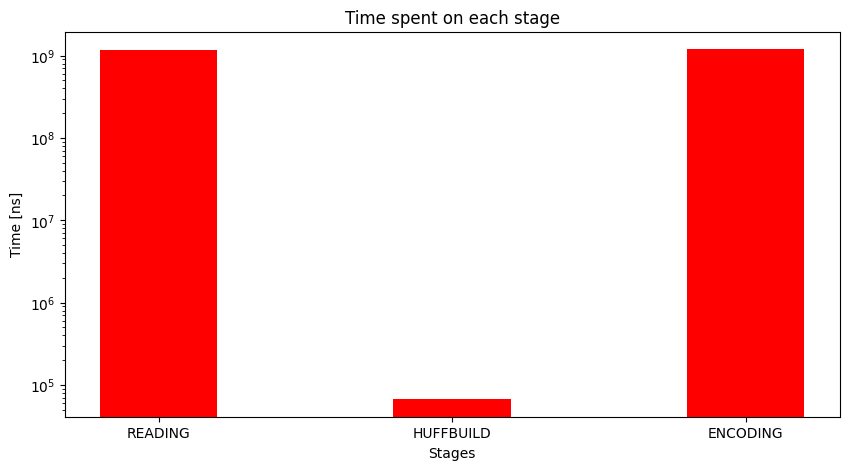

In [13]:
import matplotlib.pyplot as plt 
 
fig = plt.figure(figsize = (10, 5))
plt.bar(seq_stages, seq_means, color='red', width=0.4)
 
plt.xlabel("Stages")
plt.ylabel("Time [ns]")
plt.yscale('log')
plt.title("Time spent on each stage")
plt.show()

## Parallel (THR)

In [14]:
thr = get_standardized_measures('results/thr_10.csv', excluded_columns=['P_DEGREE'])

In [15]:
def plot_for_p(p_degree, data):
    thr_data = data[data['P_DEGREE'] == p_degree]
    thr_stages = list(thr_data.columns)
    thr_stages.remove('TOTAL')
    thr_stages.remove('P_DEGREE')
    thr_means = [seq[stage].mean() for stage in thr_stages]
    fig = plt.figure(figsize = (10, 5))
    plt.bar(thr_stages, thr_means, color='blue', width=0.4)
    plt.xlabel("Stages")
    plt.ylabel("Time [ns]")
    plt.yscale('log')
    plt.title("Time spent on each stage")
    plt.show()

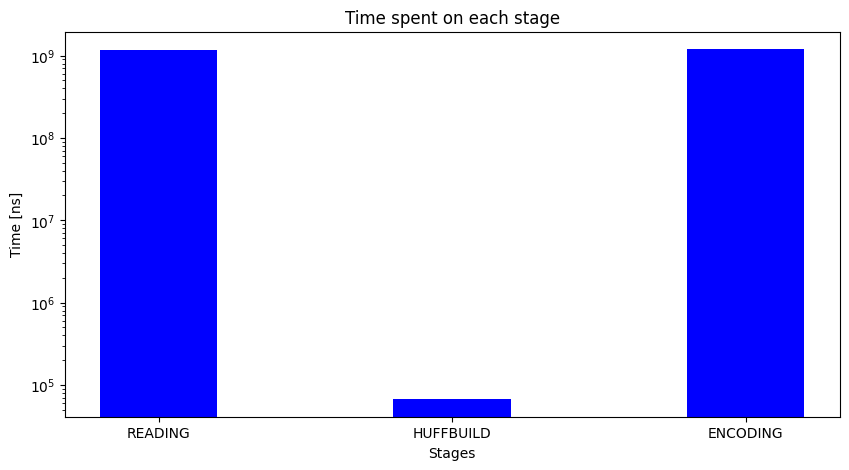

In [16]:
plot_for_p(11, thr)